In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "Resources/ttrny_conections.csv"
connections = pd.read_csv(path)
connections = connections.fillna(0).set_index(connections.columns[0])
connections

,lincoln center,central park,Midtown west,times square,united nations,chelsea,empire state,gramarcy park,greenwich village,east village,soho,chinatown,lower east side,wall street,brooklyn
Unnamed: 0,,,,,,,,,,,,,,,
lincoln center,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
central park,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Midtown west,2.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
times square,2.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
united nations,0.0,3.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chelsea,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
empire state,0.0,0.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gramarcy park,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
greenwich village,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0


In [3]:
g = nx.from_pandas_adjacency(connections)

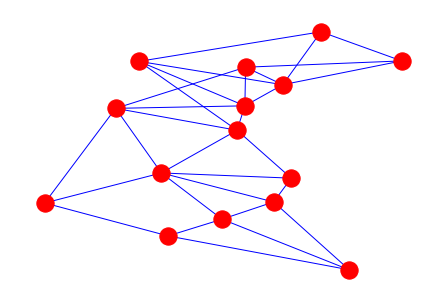

In [4]:
nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color='r', edge_color='b')

In [5]:
shortest_paths = nx.algorithms.shortest_paths.generic.shortest_path(g)
compute_lengths = lambda paths: dict(sorted({d:len(paths[d]) for d in paths}.items()))
path_lengths = {s:compute_lengths(shortest_paths[s]) for s in shortest_paths}
path_lengths = pd.DataFrame(path_lengths)
path_lengths = path_lengths[path_lengths.index]

path_lengths

,Midtown west,brooklyn,central park,chelsea,chinatown,east village,empire state,gramarcy park,greenwich village,lincoln center,lower east side,soho,times square,united nations,wall street
Midtown west,1,5,3,2,4,4,2,3,3,2,4,3,2,3,4
brooklyn,5,1,6,4,2,3,5,4,3,6,2,3,6,5,2
central park,3,6,1,4,5,4,3,3,4,2,5,5,2,2,6
chelsea,2,4,4,1,3,3,2,2,2,3,3,2,3,3,3
chinatown,4,2,5,3,1,3,4,3,2,5,2,3,5,4,2
east village,4,3,4,3,3,1,3,2,2,5,2,3,4,3,4
empire state,2,5,3,2,4,3,1,2,3,3,4,3,2,2,4
gramarcy park,3,4,3,2,3,2,2,1,2,4,3,3,3,2,4
greenwich village,3,3,4,2,2,2,3,2,1,4,2,2,4,3,3
lincoln center,2,6,2,3,5,5,3,4,4,1,5,4,2,3,5


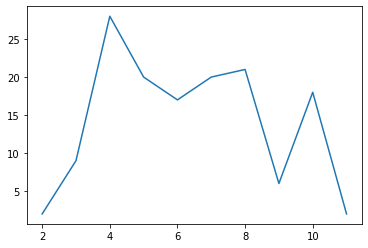

In [6]:
def compute_path_cost(dests):
    if len(dests) == 1:
        return 0

    else:
        origin = dests[0]
        dest = dests[1]
        return connections[origin][dest] + compute_path_cost(dests[1:])


compute_all_path_costs = lambda paths: dict(sorted({d:compute_path_cost(paths[d]) for d in paths}.items()))

cost = {s:compute_all_path_costs(shortest_paths[s]) for s in shortest_paths}

def remove_repeated_paths(paths):
    visited = []
    for origin in paths:
        visited.append(origin)
        for place in visited:
           del paths[origin][place]
    return paths

all_connections = [(k, p, cost[k][p]) for k in cost for p in cost[k]]

filter_func = lambda path: path[2] >= 2 and path[2] <= 11 and  path_lengths[path[0]][path[1]] > 2
filtered_connections = (list(filter(filter_func, all_connections)))

filtered_connections_costs = np.array([c[2] for c in filtered_connections])

cost_values = list(set(filtered_connections_costs))
cost_count = [sum(filtered_connections_costs == v) for v in cost_values]
cost_values_count = list(zip(cost_values, cost_count))

plt.plot(cost_values, cost_count)

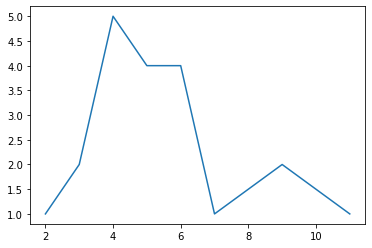

In [7]:
#chart for ttrlondon

x = [2, 3, 4, 5, 6, 7, 9, 11]
y = [1, 2, 5, 4, 4, 1, 2, 1]

plt.plot(x, y)

Both charts above tells us that that, assuming that the cost of a path is the actual ninimum number of cabs needed to complete a route, both distribution of path numbers are the similar. Checking the cards for ttr london, we see that our assumption is true and thus we can consider the cost of the path as the points awarded for completing a given route. So lets cut down the number of paths in order to have a similar number as the original game. This map is based on ttr NY balancing, so lets trim our route number to 18.

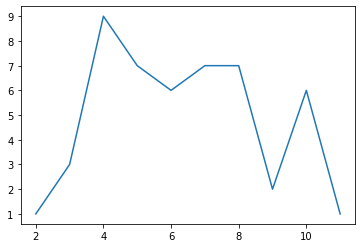

In [8]:
y = (np.array(cost_count)/3).round()
plt.plot(cost_values, y)

20.0
[1. 3. 9. 7. 6. 7. 7. 2. 6. 1.]
[1.0, 2.0, 5.0, 3.0, 2.0, 1.0, 2.0, 1.0]


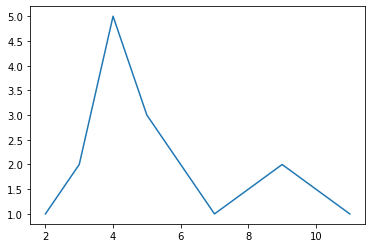

In [15]:
adjustment = [0, 1, 4, 4, 4, 6, 5, 0, 5, 0]
new_y = list(y - adjustment).copy()
print(sum(new_y))
print(y)
list_int = lambda l: [int(i) for i in l]
x = cost_values.copy()
x.pop(6)
new_y.pop(6)
x.pop(7)
new_y.pop(7)
print(new_y)
plt.plot(x, new_y)